In [38]:
import os
from glob import glob
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# 1 ,11, 7

In [39]:
!pip install gdown

In [40]:
# sub11 and s
!gdown --id 1A6LtZK4VyBm6cbm1lBxt_FDN1gvP_q-F
# sub1
!gdown --id 1YVI5Q9Zuea0gdbErLsjHl2adHVA0-MXo
# sub2
!gdown --id 1irGMlXCa4m4rW1tIjNlYjgoJr6P4aZZ_
# sub3
!gdown --id 103yo0N_T-m1s2nVpWEF6CE1COidQ_7oe
# sub4
!gdown --id 1LPTqstryZx9Zp2aL0cu_vrhX5RP9rn-t
# sub5
!gdown --id 1iQPj9QffbkF1uNera12mZHIYILLaCRNL
# sub6
!gdown --id 1e3KJmNuUMmXZteQf5O_qZ_85DHR_TpqI
# sub 7
!gdown --id 1TuIxsVjorNCCI-CoScI8dwz8fDgTRr2x
# sub 8
!gdown --id 1jcU85T6dMbzUmBFHWjhMiM1K_8cvgljb
# sub9
!gdown --id 1_gsCZ93oQVn1j2yx6wMlLGNZw6sh9n9F
# sub10
!gdown --id 1Mk5GvG4QtKzdk8N3yB4-J3JvFSmXl88o
# sub11
!gdown --id 1A6LtZK4VyBm6cbm1lBxt_FDN1gvP_q-F
# sub 12
!gdown --id 1QoBhqPcK7ca4bsHOrfYcnNQSb7xA70tv
###

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://drive.google.com/uc?id=1A6LtZK4VyBm6cbm1lBxt_FDN1gvP_q-F 

/opt/conda/lib/python3.10/site-packages/gdown/cli.py:126: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Access denied with the following error:

 	Cannot retrieve the public link of the file. You may need to change
	the permission to 'Anyone with the link', or have had many accesses. 

You may still be able to access the file from the browser:

	 https://dri

In [170]:
import os
import numpy as np
import pandas as pd
import warnings
import scipy.io
warnings.filterwarnings('ignore')
s1=r'/kaggle/working/EEG_session1_sub1_reaching_MI.mat'
s2=r'/kaggle/working/EEG_session1_sub2_reaching_MI.mat'
s3=r'/kaggle/working/EEG_session1_sub3_reaching_MI.mat'
s4=r'/kaggle/working/EEG_session1_sub4_reaching_MI.mat'
s5=r'/kaggle/working/EEG_session1_sub5_reaching_MI.mat'
s6=r'/kaggle/working/EEG_session1_sub6_reaching_MI.mat'
s7=r'/kaggle/working/EEG_session1_sub7_reaching_MI.mat'
s8=r'/kaggle/working/EEG_session1_sub8_reaching_MI.mat'
s9=r'/kaggle/working/EEG_session1_sub9_reaching_MI.mat'
s10=r'/kaggle/working/EEG_session1_sub10_reaching_MI.mat'
s11=r'/kaggle/working/EEG_session1_sub11_reaching_MI.mat'
s12=r'/kaggle/working/EEG_session1_sub12_reaching_MI.mat'

In [136]:
ch=['ch1', 'ch2', 'ch3', 'ch4', 'ch5', 'ch6', 'ch7', 'ch8', 'ch9', 'ch10', 'ch11', 'ch12', 'ch13', 'ch14', 'ch15', 'ch16', 'ch17', 'ch18', 'ch19', 'ch20', 'ch21', 'ch22', 'ch23', 'ch24', 'ch25', 'ch26', 'ch27', 'ch28', 'ch29', 'ch30', 'ch31', 'ch32', 'ch33', 'ch34', 'ch35', 'ch36', 'ch37', 'ch38', 'ch39', 'ch40', 'ch41', 'ch42', 'ch43', 'ch44', 'ch45', 'ch46', 'ch47', 'ch48', 'ch49', 'ch50', 'ch51', 'ch52', 'ch53', 'ch54', 'ch55', 'ch56', 'ch57', 'ch58', 'ch59', 'ch60']

In [137]:
def load_subject(subject_file):
    m = scipy.io.loadmat(subject_file, struct_as_record=True)
    arr=[m[i] for i in ch]
    arr=np.hstack(arr)
    EEG=arr.T
    nchannels, nsamples =EEG.shape
    sample_rate = m['nfo']['fs'][0][0][0][0]
    channel_names = [s[0] for s in m['nfo']['clab'][0][0][0]]
    event_onsets = m['mrk'][0][0][0]
    event_codes = m['mrk'][0][0][1]
    labels = np.zeros((1, nsamples), int)
    labels[0, event_onsets] = event_codes
    cl_lab = [s[0] for s in m['nfo']['className'][0][0][0]]
    nclasses = len(cl_lab)
    nevents = len(event_onsets)
    cd=[11, 21, 31, 41, 51, 61]
    cl_lab=[ 'Forward','Backward','Left', 'Right','Up', 'Down']
    win = np.arange(int(0*sample_rate), int(4*sample_rate))
    trials = {}

    # The time window (in samples) to extract for each trial, here 0.5 -- 2.5 seconds
    win = np.arange(int(0*sample_rate), int(4*sample_rate))

    # Length of the time window
    nsamples = len(win)
    
    # Loop over the classes (right, foot)
    for cl, code in zip(cl_lab, cd):

        # Extract the onsets for the class
        cl_onsets = event_onsets[event_codes == code]

        # Allocate memory for the trials
        trials[cl] = np.zeros((nchannels, nsamples, len(cl_onsets)))

        # Extract each trial
        for i, onset in enumerate(cl_onsets):
            trials[cl][:,:,i] = EEG[:, win+onset]
    labels[0, event_onsets] = event_codes
    
    return trials , labels , sample_rate , nsamples
    

In [138]:
cl_lab=[ 'Forward','Backward','Left', 'Right','Up', 'Down']
events=[ 'Forward','Backward','Left', 'Right','Up', 'Down']
cl1=cl_lab[0]
cl2=cl_lab[1]
cl3=cl_lab[2]
cl4=cl_lab[3]
cl5=cl_lab[4]
cl6=cl_lab[5]

10000
Shape of trials[cl1]: (60, 10000, 50)


array([[0, 0, 0, ..., 0, 0, 0]])

In [140]:
import scipy.signal 
from scipy.signal import butter,lfilter

def bandpass(trials, lo, hi, sample_rate,nsamples):
    '''
    Designs and applies a bandpass filter to the signal.
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEGsignal
    lo : float
        Lower frequency bound (in Hz)
    hi : float
        Upper frequency bound (in Hz)
    sample_rate : float
        Sample rate of the signal (in Hz)
    
    Returns
    -------
    trials_filt : 3d-array (channels x samples x trials)
        The bandpassed signal
    '''
#man made it  odrer =6
    # The iirfilter() function takes the filter order: higher numbers mean a sharper frequency cutoff,
    # but the resulting signal might be shifted in time, lower numbers mean a soft frequency cutoff,
    # but the resulting signal less distorted in time. It also takes the lower and upper frequency bounds
    # to pass, divided by the niquist frequency, which is the sample rate divided by 2:
    a, b = scipy.signal.iirfilter(4, [lo/(sample_rate/2.0), hi/(sample_rate/2.0)],ftype='butter')
    # Applying the filter to each trial
    ntrials = trials.shape[2]
    trials_filt = np.zeros((60, nsamples, ntrials))
    for i in range(ntrials):
        trials_filt[:,:,i] = scipy.signal.filtfilt(a, b, trials[:,:,i], axis=1)
    
    return trials_filt

In [141]:
def whitening(sigma):
    ''' Calculate a whitening matrix for covariance matrix sigma. '''
    U, l, _ = linalg.svd(sigma)
    return U.dot( np.diag(l ** -0.5))

In [142]:
from numpy import linalg

def cov(trials,nsamples):
    ''' Calculate the covariance for each trial and return their average '''
    ntrials = trials.shape[2]
    covs = [ trials[:,:,i].dot(trials[:,:,i].T) / nsamples for i in range(ntrials) ]
    return np.mean(covs, axis=0)

In [143]:
def csp(trials_r, trials_f,nsamples):
    '''
    Calculate the CSP transformation matrix W.
    arguments:
        trials_r - Array (channels x samples x trials) containing right hand movement trials
        trials_f - Array (channels x samples x trials) containing foot movement trials
    returns:
        Mixing matrix W
    '''
    cov_r = cov(trials_r,nsamples)
    cov_f = cov(trials_f,nsamples)
    P = whitening(cov_r + cov_f)
    B, _, _ = linalg.svd( P.T.dot(cov_f).dot(P) )
    W = P.dot(B)
    return W

In [147]:
def apply_mix(W, trials,nchannels,nsamples):
    ''' Apply a mixing matrix to each trial (basically multiply W with the EEG signal matrix)'''
    ntrials = trials.shape[2]
    trials_csp = np.zeros((nchannels, nsamples, ntrials))
    for i in range(ntrials):
        trials_csp[:,:,i] = W.T.dot(trials[:,:,i])
    return trials_csp

In [148]:
def logvar(trials):
    '''
    Calculate the log-var of each channel.
    
    Parameters
    ----------
    trials : 3d-array (channels x samples x trials)
        The EEG signal.
        
    Returns
    -------
    logvar - 2d-array (channels x trials)
        For each channel the logvar of the signal
    '''
    return np.log(np.var(trials, axis=1))

In [149]:
def filtreing(trials_dict,sample_rate,nsamples):
    """
    returns filtered data dictionary
    """

    #Apply the function
    trials_filt = {cl1: bandpass(trials_dict[cl1], 8, 30, sample_rate,nsamples),
                   cl2: bandpass(trials_dict[cl2], 8, 30, sample_rate,nsamples),
                   cl3: bandpass(trials_dict[cl3], 8, 30, sample_rate,nsamples),
                   cl4: bandpass(trials_dict[cl4], 8, 30, sample_rate,nsamples),
                   cl5: bandpass(trials_dict[cl5], 8, 30, sample_rate,nsamples),
                   cl6: bandpass(trials_dict[cl6], 8, 30, sample_rate,nsamples)}

    
    return trials_filt

In [150]:
def train_csp(train,n_channels,n_samples):
    """
    use only for training data 
    returns mixing matrices
    """
    
    W1 = csp(train[cl1], train[cl2],n_samples)
    W2 = csp(train[cl2], train[cl3],n_samples)
    W3 = csp(train[cl3], train[cl4],n_samples)
    W4 = csp(train[cl4], train[cl5],n_samples)
    W5 = csp(train[cl5], train[cl6],n_samples)

    return W1,W2,W3,W4,W5

In [151]:
def apply_csp(train,W1,W2,W3,W4,W5,nchannels,nsamples):
    
    """
    returns csp features
    """
    
    train[cl1] = apply_mix(W1, train[cl1],nchannels,nsamples)
    train[cl2] = apply_mix(W1, train[cl2],nchannels,nsamples)

    train[cl2] = apply_mix(W2, train[cl2],nchannels,nsamples)
    train[cl3] = apply_mix(W2, train[cl3],nchannels,nsamples)


    train[cl3] = apply_mix(W3, train[cl3],nchannels,nsamples)
    train[cl4] = apply_mix(W3, train[cl4],nchannels,nsamples)


    train[cl4] = apply_mix(W4, train[cl4],nchannels,nsamples)
    train[cl5] = apply_mix(W4, train[cl5],nchannels,nsamples)

    train[cl5] = apply_mix(W5, train[cl5],nchannels,nsamples)
    train[cl6] = apply_mix(W5, train[cl6],nchannels,nsamples)
    

    comp = np.array([0,-1])
    
    train[cl1] = train[cl1][comp,:,:]

    train[cl2] = train[cl2][comp,:,:]

    train[cl3] = train[cl3][comp,:,:]

    train[cl4] = train[cl4][comp,:,:]

    train[cl5] = train[cl5][comp,:,:]

    train[cl6] = train[cl6][comp,:,:]
    
   
    # Calculate the log-var
    train[cl1] = logvar(train[cl1])
    train[cl2] = logvar(train[cl2])
    train[cl3] = logvar(train[cl3])
    train[cl4] = logvar(train[cl4])
    train[cl5] = logvar(train[cl5])
    train[cl6] = logvar(train[cl6])

   
    
    return train

In [152]:
def select_events_prepare(events,train):
    """
    returns xtrain, ytrain ready for classification
    """

    ytrain=[]
    xtrain=[]
    for l in range(len(events)):
        for j in range(train[events[l]].shape[1]):
            ytrain.append(l)
        xtrain.append(train[events[l]].T)
        

    xtrain=np.vstack(xtrain)
    ytrain = np.array(ytrain)

  
    
    return xtrain,ytrain

In [161]:
def prepare_subject(trials,sample_rate,n_samples):
    train = {
        cl1: trials[cl1][:,:,:30],
        cl2: trials[cl2][:,:,:30],
        cl3: trials[cl3][:,:,:30],
        cl4: trials[cl4][:,:,:30],
        cl5: trials[cl5][:,:,:30],
        cl6: trials[cl6][:,:,:30],}

    validation ={
            cl1: trials[cl1][:,:,30:40],
            cl2: trials[cl2][:,:,30:40],
            cl3: trials[cl3][:,:,30:40],
            cl4: trials[cl4][:,:,30:40],
            cl5: trials[cl5][:,:,30:40],
            cl6: trials[cl6][:,:,30:40],}

    test = {cl1: trials[cl1][:,:,40:],
            cl2: trials[cl2][:,:,40:],
            cl3: trials[cl3][:,:,40:],
            cl4: trials[cl4][:,:,40:],
            cl5: trials[cl5][:,:,40:],
            cl6: trials[cl6][:,:,40:],}
    train_filt=filtreing(train,sample_rate,n_samples)
    test_filt=filtreing(test,sample_rate,n_samples)
    validation_filt=filtreing(validation,sample_rate,n_samples)
    W1,W2,W3,W4,W5=train_csp(train_filt,n_samples)
    train=apply_csp(train_filt,W1,W2,W3,W4,W5,60,n_samples)
    test=apply_csp(test_filt,W1,W2,W3,W4,W5,60,n_samples)
    validation=apply_csp(validation_filt,W1,W2,W3,W4,W5,60,n_samples)
    xtrain,ytrain=select_events_prepare(events,train)
    xtest,ytest=select_events_prepare(events,test)
    xval,yval=select_events_prepare(events,validation)
    
    return xtrain,ytrain,xtest,ytest,xval,yval

In [171]:
def read_data(path):
    trials , labels , sample_rate , nsamples = load_subject(path)
    xtrain,ytrain,xtest,ytest,xval,yval = prepare_subject(trials,sample_rate,nsamples)
    return xtrain,ytrain,xtest,ytest,xval,yval

In [183]:
xtrain_cross,ytrain_cross,xtest_cross,ytest_cross,xval_cross,yval_cross = [],[],[],[],[],[]
paths = [s7,s8,s10,s11]
for path in paths:
    xtrain,ytrain,xtest,ytest,xval,yval = read_data(path)
    xtrain_cross.append(xtrain)
    ytrain_cross.append(ytrain)
    xtest_cross.append(xtest)
    ytest_cross.append(ytest)
    xval_cross.append(xval)
    yval_cross.append(yval)

10000
Shape of trials[cl1]: (60, 10000, 50)
shape after filter (60, 10000, 30)
shape after filter (60, 10000, 10)
shape after filter (60, 10000, 10)
shape after csp (2, 10000, 30)
shape after logvar (2, 30)
shape after csp (2, 10000, 10)
shape after logvar (2, 10)
shape after csp (2, 10000, 10)
shape after logvar (2, 10)
x train shape (180, 2)
y train shape (180,)
x train shape (60, 2)
y train shape (60,)
x train shape (60, 2)
y train shape (60,)
10000
Shape of trials[cl1]: (60, 10000, 50)
shape after filter (60, 10000, 30)
shape after filter (60, 10000, 10)
shape after filter (60, 10000, 10)
shape after csp (2, 10000, 30)
shape after logvar (2, 30)
shape after csp (2, 10000, 10)
shape after logvar (2, 10)
shape after csp (2, 10000, 10)
shape after logvar (2, 10)
x train shape (180, 2)
y train shape (180,)
x train shape (60, 2)
y train shape (60,)
x train shape (60, 2)
y train shape (60,)
10000
Shape of trials[cl1]: (60, 10000, 50)
shape after filter (60, 10000, 30)
shape after filter 

In [196]:
xtrain_cross = np.vstack(xtrain_cross)
ytrain_cross = np.hstack(ytrain_cross)
xtest_cross = np.vstack(xtest_cross)
ytest_cross = np.hstack(ytest_cross)
xval_cross = np.vstack(xval_cross)
yval_cross = np.hstack(yval_cross)
xtrain_cross.shape ,ytrain_cross.shape ,xtest_cross.shape ,ytest_cross.shape ,xval_cross.shape ,yval_cross.shape

((720, 2), (720,), (240, 2), (240,), (240, 2), (240,))

In [224]:
from sklearn.utils import shuffle
xtrain_cross,ytrain_cross=shuffle(xtrain_cross,ytrain_cross,random_state=42)

In [225]:
ytrain_cross

array([2, 4, 3, 4, 1, 0, 2, 2, 1, 4, 3, 3, 3, 5, 4, 5, 1, 1, 1, 5, 5, 5,
       1, 0, 4, 0, 3, 5, 3, 3, 3, 0, 2, 2, 3, 1, 0, 2, 1, 3, 1, 0, 3, 5,
       1, 5, 3, 5, 4, 0, 3, 4, 0, 1, 5, 0, 2, 4, 0, 0, 4, 0, 5, 2, 1, 0,
       3, 5, 1, 1, 0, 4, 2, 1, 2, 0, 2, 5, 4, 2, 5, 1, 0, 1, 2, 0, 4, 0,
       2, 2, 3, 3, 4, 5, 0, 5, 1, 2, 5, 1, 1, 0, 1, 0, 3, 2, 0, 1, 3, 1,
       0, 1, 5, 2, 0, 1, 3, 4, 2, 3, 2, 3, 0, 4, 0, 0, 0, 1, 4, 3, 4, 5,
       0, 0, 4, 3, 4, 4, 4, 0, 5, 4, 5, 0, 4, 4, 2, 0, 0, 4, 4, 2, 3, 3,
       4, 0, 3, 0, 4, 5, 5, 5, 3, 0, 3, 0, 1, 4, 3, 5, 4, 1, 2, 3, 3, 4,
       1, 0, 3, 2, 2, 1, 1, 1, 5, 5, 5, 4, 2, 4, 2, 0, 4, 5, 3, 5, 5, 3,
       2, 5, 5, 5, 5, 1, 0, 2, 2, 1, 5, 5, 4, 2, 5, 0, 1, 3, 2, 5, 5, 3,
       0, 0, 3, 0, 4, 0, 1, 1, 5, 1, 0, 3, 4, 1, 3, 1, 2, 2, 4, 0, 2, 2,
       5, 1, 5, 2, 0, 0, 2, 5, 3, 3, 2, 4, 4, 4, 3, 2, 4, 5, 4, 3, 5, 5,
       2, 2, 0, 5, 2, 3, 2, 0, 5, 1, 0, 3, 4, 0, 4, 4, 4, 1, 2, 3, 3, 3,
       2, 2, 5, 4, 3, 2, 3, 5, 1, 3, 3, 1, 3, 5, 0,

In [226]:
from sklearn import svm
from sklearn import metrics

from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix

#Create a svm Classifier
clf = svm.SVC(kernel='rbf',random_state=42) # Linear Kernel

#Train the model using the training sets
clf.fit(xtrain_cross, ytrain_cross)

#Predict the response for test dataset
y_pred = clf.predict(xval_cross)
print("Accuracy:",metrics.accuracy_score(yval_cross, y_pred))


Accuracy: 0.8333333333333334


Accuracy: 0.8666666666666667


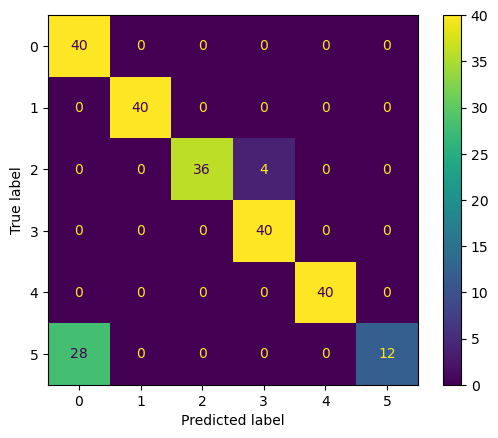

In [227]:
y_pred = clf.predict(xtest_cross)
cm=confusion_matrix(ytest_cross, y_pred)

print("Accuracy:",metrics.accuracy_score(ytest_cross, y_pred))
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [245]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

clf = LinearDiscriminantAnalysis(solver='eigen')#'lsqr', 'eigen'


#Train the model using the training sets
clf.fit(xtrain_cross, ytrain_cross)

#Predict the response for test dataset
y_pred = clf.predict(xval_cross)

print("Accuracy:",metrics.accuracy_score(yval_cross, y_pred))

Accuracy: 0.8166666666666667


Accuracy: 0.8333333333333334


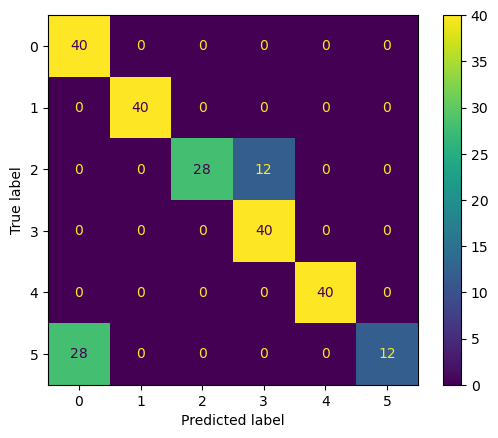

In [246]:
y_pred = clf.predict(xtest_cross)
cm=confusion_matrix(ytest_cross, y_pred)

print("Accuracy:",metrics.accuracy_score(ytest_cross, y_pred))
disp=ConfusionMatrixDisplay(cm)
disp.plot()

In [236]:
X_train=xtrain_cross
X_val=xval_cross

import tensorflow as tf
def build_model(num_classes):

#     inputs = tf.keras.Input(shape=(X_train.shape[1],X_train.shape[2]))
# #     x = tf.keras.layers.Reshape((-1, 60))(inputs)
#     x = tf.keras.layers.LSTM(256, return_sequences=True)(inputs)
#     x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
#     x = tf.keras.layers.LSTM(256, return_sequences=True)(x)
#     x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
#     x = tf.keras.layers.LSTM(256, return_sequences=True)(x)
#     x = tf.keras.layers.LSTM(64)(x)
    inputs = tf.keras.Input(shape=(None, X_train.shape[1]))
    x = tf.keras.layers.Reshape((-1, X_train.shape[1]))(inputs)
    x = tf.keras.layers.LSTM(256, return_sequences=True)(x)
    x = tf.keras.layers.LSTM(256, return_sequences=True)(x)
    x = tf.keras.layers.LSTM(256, return_sequences=True)(x)
    x = tf.keras.layers.LSTM(128, return_sequences=True)(x)
    x = tf.keras.layers.LSTM(64)(x)

    outputs = tf.keras.layers.Dense(num_classes, activation='softmax')(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(
        optimizer='Adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

In [238]:
user_model = build_model(num_classes=6)
Epochs=200
checkpoint_path="weights_lstm.best.hdf5"
check_point = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,save_best_only=True,monitor='val_accuracy' ,save_weights_only=True, verbose=1)

user_history = user_model.fit(
    X_train,
    ytrain_cross,
    epochs=Epochs,           
    batch_size=15,
    validation_data=(X_val,yval_cross)
,callbacks=[check_point])

Epoch 1/200
48/48 [==============================] - ETA: 0s - loss: 1.6664 - accuracy: 0.2583
Epoch 1: val_accuracy improved from -inf to 0.33333, saving model to weights_lstm.best.hdf5
48/48 [==============================] - 9s 54ms/step - loss: 1.6664 - accuracy: 0.2583 - val_loss: 1.4900 - val_accuracy: 0.3333
Epoch 2/200
47/48 [============================>.] - ETA: 0s - loss: 1.3433 - accuracy: 0.3518
Epoch 2: val_accuracy improved from 0.33333 to 0.50000, saving model to weights_lstm.best.hdf5
48/48 [==============================] - 1s 17ms/step - loss: 1.3389 - accuracy: 0.3542 - val_loss: 1.1669 - val_accuracy: 0.5000
Epoch 3/200
45/48 [===========================>..] - ETA: 0s - loss: 1.0872 - accuracy: 0.4252
Epoch 3: val_accuracy did not improve from 0.50000
48/48 [==============================] - 1s 17ms/step - loss: 1.0806 - accuracy: 0.4250 - val_loss: 0.8579 - val_accuracy: 0.5000
Epoch 4/200
45/48 [===========================>..] - ETA: 0s - loss: 0.7604 - accuracy:

In [239]:
user_model.load_weights("weights_lstm.best.hdf5")

8/8 [==============================] - 0s 6ms/step
Accuracy: 0.85


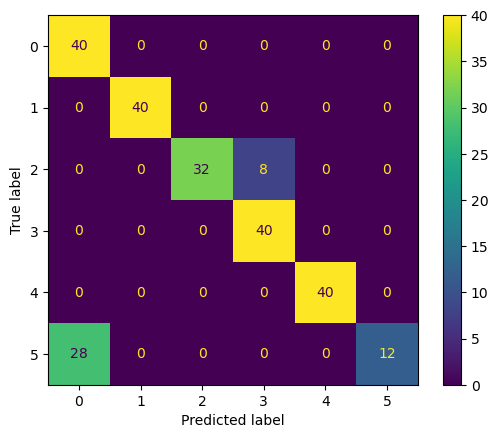

In [247]:
y_pred = user_model.predict(xtest_cross)

y_pred=[np.argmax(v) for v in y_pred]
print("Accuracy:",metrics.accuracy_score(ytest_cross, y_pred))

from sklearn.metrics import ConfusionMatrixDisplay ,confusion_matrix

cm=confusion_matrix(ytest_cross, y_pred)
disp=ConfusionMatrixDisplay(cm)
disp.plot()